In [45]:
import pandas as pd
import matplotlib
import math
import numpy as np
import requests
import json
from matplotlib import pyplot as plt
%matplotlib inline

# Solr

Given a file in .XLSX format containing information about trees, we developed a code in Python to create an index in Solr for storing that data. So, we can retrieve information about any tree we want more easily. Now, let's see examples of what we can do using Solr.

In [46]:
# Retrieve all trees
resp = requests.get('http://localhost:8983/solr/urban-forest/select?q=*:*&rows=300000')
all_trees = pd.DataFrame(resp.json()['response']['docs'])
print("Number of retrieved trees: {}".format(len(all_trees)))
all_trees.head()

Number of retrieved trees: 270649


DBH            _version_ area_id             area_name  carbon_storage  \
0  5.0  1601718596578312192       2  RAYMOND-P/ENTREÉ-ST.             NaN   
1  5.0  1601718596581457920       2  RAYMOND-P/ENTREÉ-ST.             NaN   
2  5.0  1601718596581457921       2  RAYMOND-P/ENTREÉ-ST.             NaN   
3  5.0  1601718596581457922       2  RAYMOND-P/ENTREÉ-ST.             NaN   
4  5.0  1601718596581457923       2  RAYMOND-P/ENTREÉ-ST.             NaN   

  civic_number    code                                  coord date_measures  \
0          NaN    QURU  45.551868858892355,-73.63075958747143    2016-10-24   
1          NaN    BEAL   45.552787071654166,-73.6317126860135    2016-10-24   
2          NaN    PIPU   45.55288271654058,-73.63176608766788    2016-11-02   
3          NaN  ACSAPY   45.55277706936158,-73.63181074506207    2016-11-01   
4          NaN  ACSAPY   45.55284054415716,-73.63188834251845    2016-11-01   

   date_plant    ...         pos_y property remarkable  \
0  2016-10-24    ...     5045781.0    Ville          N   
1  2016-10-24    ...     5045883.5    Ville          N   
2  2016-11-02    ...     5045894.0    Ville          N   
3  2016-11-01    ...     5045882.5    Ville          N   
4  2016-11-01    ...     5045889.5    Ville          N   

            specie_english             specie_french  \
0                  Red Oak               Chêne rouge   
1             Yellow Birch             Bouleau jaune   
2          Colorado Spruce      Épinette du Colorado   
3  Pyramidale Silver Maple  Érable argenté Pyramidal   
4  Pyramidale Silver Maple  Érable argenté Pyramidal   

                     specie_latin street street_side tree_id uqam_code  
0                   Quercus rubra    NaN         NaN  182956      QURU  
1           Betula alleghaniensis    NaN         NaN  182957      BEAL  
2                   Picea pungens    NaN         NaN  182958      PIPU  
3  Acer saccharinum 'Pyramidalis'    NaN         NaN  182959      ACSI  
4  Acer saccharinum 'Pyramidalis'    NaN         NaN  182960      ACSI  

[5 rows x 34 columns]

In [17]:
# Get only trees with code UQAM equals ACPL.
params={
    'q': 'uqam_code:ACPL',
    'rows': 300000
}

resp = requests.get('http://localhost:8983/solr/urban-forest/select?',params=params)
trees = pd.DataFrame(resp.json()['response']['docs'])
print("Number of retrieved trees: {}".format(len(trees)))
trees

Number of retrieved trees: 48219


DBH            _version_ area_id area_name  carbon_storage  \
0      10.0  1601718596620255234       1   INCONNU             NaN   
1      10.0  1601718596620255235       1   INCONNU             NaN   
2      15.0  1601718596620255236       1   INCONNU             NaN   
3      15.0  1601718596620255238       1   INCONNU             NaN   
4       7.0  1601718596621303809       1   INCONNU             NaN   
5       7.0  1601718596621303810       1   INCONNU             NaN   
6       5.0  1601718596621303811       1   INCONNU             NaN   
7       5.0  1601718596621303812       1   INCONNU             NaN   
8       5.0  1601718596621303813       1   INCONNU             NaN   
9       5.0  1601718596621303814       1   INCONNU             NaN   
10      5.0  1601718596621303815       1   INCONNU             NaN   
11      6.0  1601718596626546696       1   INCONNU             NaN   
12      5.0  1601718596627595272       1   INCONNU             NaN   
13      5.0  1601718596627595273       1   INCONNU             NaN   
14      5.0  1601718596628643840       1   INCONNU             NaN   
15     13.0  1601718596631789574       2       SUD             NaN   
16     13.0  1601718596631789575       2       SUD             NaN   
17      5.0  1601718596633886724       1   INCONNU             NaN   
18      5.0  1601718596633886728       1   INCONNU             NaN   
19     10.0  1601718596634935308       1   INCONNU             NaN   
20     10.0  1601718596635983872       1   INCONNU             NaN   
21      5.0  1601718596654858241       1   INCONNU             NaN   
22     15.0  1601718596655906821       1   INCONNU             NaN   
23     23.0  1601718596658003973       1   INCONNU             NaN   
24     26.0  1601718596658003978       1   INCONNU             NaN   
25     16.0  1601718596659052546       1   INCONNU             NaN   
26     36.0  1601718596660101127       1   INCONNU             NaN   
27     30.0  1601718596660101129       1   INCONNU             NaN   
28     24.0  1601718596661149696       1   INCONNU             NaN   
29     19.0  1601718596661149697       1   INCONNU             NaN   
...     ...                  ...     ...       ...             ...   
48189  16.0  1601718623104139271     NaN       NaN             NaN   
48190  12.0  1601718623104139272     NaN       NaN             NaN   
48191  16.0  1601718623104139273     NaN       NaN             NaN   
48192  14.0  1601718623104139274     NaN       NaN             NaN   
48193  13.0  1601718623104139275     NaN       NaN             NaN   
48194  14.0  1601718623105187840     NaN       NaN             NaN   
48195  15.0  1601718623105187841     NaN       NaN             NaN   
48196  16.0  1601718623105187842     NaN       NaN             NaN   
48197  13.0  1601718623105187843     NaN       NaN             NaN   
48198  14.0  1601718623105187844     NaN       NaN             NaN   
48199  13.0  1601718623105187845     NaN       NaN             NaN   
48200  15.0  1601718623105187846     NaN       NaN             NaN   
48201  14.0  1601718623105187847     NaN       NaN             NaN   
48202  14.0  1601718623105187848     NaN       NaN             NaN   
48203  14.0  1601718623105187849     NaN       NaN             NaN   
48204  13.0  1601718623105187850     NaN       NaN             NaN   
48205  17.0  1601718623105187851     NaN       NaN             NaN   
48206  13.0  1601718623106236416     NaN       NaN             NaN   
48207  16.0  1601718623106236417     NaN       NaN             NaN   
48208  13.0  1601718623106236418     NaN       NaN             NaN   
48209  12.0  1601718623106236419     NaN       NaN             NaN   
48210  14.0  1601718623106236420     NaN       NaN             NaN   
48211  13.0  1601718623106236421     NaN       NaN             NaN   
48212  12.0  1601718623106236422     NaN       NaN             NaN   
48213  10.0  1601718623106236423     NaN       NaN             NaN   
48214   9.0  16017

In [18]:
# Get only trees of specie 'Quercus rubra'
params={
    'q': 'specie_latin:Quercus rubra',
    'rows': 300000
}

resp = requests.get('http://localhost:8983/solr/urban-forest/select?',params=params)
trees = pd.DataFrame(resp.json()['response']['docs'])
print("Number of retrieved trees: {}".format(len(trees)))
trees

Number of retrieved trees: 7974


DBH            _version_ area_id             area_name  carbon_storage  \
0     15.0  1601718599319289862       2             HUTCHISON             NaN   
1     14.0  1601718603082629121     NaN                   NaN             NaN   
2      3.0  1601718604190973953       1         Parc Lefebvre        1.983996   
3      3.0  1601718604190973955       1         Parc Lefebvre        1.983996   
4      3.0  1601718604190973957       1         Parc Lefebvre        1.983996   
5      4.0  1601718604192022529       1         Parc Lefebvre        3.714386   
6      5.0  1601718604192022532       1         Parc Lefebvre        6.072411   
7      4.0  1601718604193071111       1         Parc Lefebvre        3.714386   
8      4.0  1601718604193071112       1         Parc Lefebvre        3.714386   
9      4.0  1601718604193071113       1         Parc Lefebvre        3.714386   
10     4.0  1601718604193071114       1         Parc Lefebvre        3.714386   
11    53.0  1601718604267520003     NaN                   NaN     1310.221000   
12    30.0  1601718604500303879     NaN                   NaN      351.755280   
13    35.0  1601718604506595337     NaN                   NaN      501.871900   
14    56.0  1601718604508692483     NaN                   NaN     1488.558600   
15    23.3  1601718604557975553     NaN                   NaN      196.706440   
16    13.0  1601718604625084422     NaN                   NaN       51.864360   
17    69.0  1601718604631375872     NaN                   NaN     2416.109100   
18    28.0  1601718604634521603     NaN                   NaN      300.089970   
19    50.0  1601718604649201670     NaN                   NaN     1144.779200   
20    50.0  1601718604649201671     NaN                   NaN     1144.779200   
21    25.0  1601718604714213382     NaN                   NaN      231.240590   
22    15.0  1601718604715261954     NaN                   NaN       71.827050   
23    90.0  1601718604821168133     NaN                   NaN     4480.361000   
24    71.0  1601718604822216710     NaN                   NaN     2581.870000   
25    22.0  1601718604861014022     NaN                   NaN      172.426930   
26    19.0  1601718604861014023     NaN                   NaN      123.235250   
27    26.0  1601718604878839816     NaN                   NaN      253.055800   
28    60.0  1601718604885131274     NaN                   NaN     1746.818700   
29    59.0  1601718604889325580     NaN                   NaN     1680.033700   
...    ...                  ...     ...                   ...             ...   
7944   8.0  1601718602727161856     NaN                   NaN             NaN   
7945   5.0  1601718603043831816     NaN                   NaN             NaN   
7946   5.0  1601718603173855237     NaN                   NaN             NaN   
7947   5.0  1601718612824948739     NaN                   NaN             NaN   
7948   3.0  1601718615255547908       0                   NaN             NaN   
7949   3.0  1601718616199266306       0                   NaN             NaN   
7950   3.0  1601718616199266307       0                   NaN             NaN   
7951   3.0  1601718616201363460       0                   NaN             NaN   
7952   3.0  1601718616201363461       0                   NaN             NaN   
7953   3.0  1601718616201363462       0                   NaN             NaN   
7954   3.0  1601718616299929607       0                   NaN             NaN   
7955   3.0  1601718616299929613       0                   NaN             NaN   
7956   3.0  1601718616304123906       0                   NaN             NaN   
7957   3.0  1601718616413175810       0                   NaN             NaN   
7958   3.0  1601718616492867593       0                   NaN             NaN   
7959   5.0  1601718617099993092     NaN                   NaN             NaN   
7960   5.0  1601718617390448649     NaN                   NaN             NaN   
7961  10.0  1601718617588629511     Na

In [19]:
# Get only trees of familly 'Sapindaceae'
params={
    'q': 'family:Sapindaceae',
    'rows': 300000

}

resp = requests.get('http://localhost:8983/solr/urban-forest/select?',params=params)
trees = pd.DataFrame(resp.json()['response']['docs'])
print("Number of retrieved trees: {}".format(len(trees)))
trees

Number of retrieved trees: 96185


DBH            _version_ area_id             area_name  \
0       5.0  1601718596581457922       2  RAYMOND-P/ENTREÉ-ST.   
1       5.0  1601718596581457923       2  RAYMOND-P/ENTREÉ-ST.   
2       5.0  1601718596582506502       1               INCONNU   
3       5.0  1601718596583555079       1               INCONNU   
4       5.0  1601718596583555080       1               Inconnu   
5       5.0  1601718596583555081       1               Inconnu   
6      34.0  1601718596613963781       1               INCONNU   
7      33.0  1601718596617109506       1               INCONNU   
8      29.0  1601718596617109507       1               INCONNU   
9      33.0  1601718596617109508       1               INCONNU   
10      9.0  1601718596618158087       2               INCONNU   
11     10.0  1601718596618158088       2               INCONNU   
12      9.0  1601718596618158089       2               INCONNU   
13     36.0  1601718596619206661       1               INCONNU   
14      5.0  1601718596620255233       2                   SUD   
15     10.0  1601718596620255234       1               INCONNU   
16     10.0  1601718596620255235       1               INCONNU   
17     15.0  1601718596620255236       1               INCONNU   
18     15.0  1601718596620255238       1               INCONNU   
19      7.0  1601718596621303809       1               INCONNU   
20      7.0  1601718596621303810       1               INCONNU   
21      5.0  1601718596621303811       1               INCONNU   
22      5.0  1601718596621303812       1               INCONNU   
23      5.0  1601718596621303813       1               INCONNU   
24      5.0  1601718596621303814       1               INCONNU   
25      5.0  1601718596621303815       1               INCONNU   
26     17.0  1601718596623400965       1               INCONNU   
27     16.0  1601718596623400968       1               INCONNU   
28     12.0  1601718596624449541       1               INCONNU   
29     16.0  1601718596624449542       1               INCONNU   
...     ...                  ...     ...                   ...   
96155  13.0  1601718623104139275     NaN                   NaN   
96156  14.0  1601718623105187840     NaN                   NaN   
96157  15.0  1601718623105187841     NaN                   NaN   
96158  16.0  1601718623105187842     NaN                   NaN   
96159  13.0  1601718623105187843     NaN                   NaN   
96160  14.0  1601718623105187844     NaN                   NaN   
96161  13.0  1601718623105187845     NaN                   NaN   
96162  15.0  1601718623105187846     NaN                   NaN   
96163  14.0  1601718623105187847     NaN                   NaN   
96164  14.0  1601718623105187848     NaN                   NaN   
96165  14.0  1601718623105187849     NaN                   NaN   
96166  13.0  1601718623105187850     NaN                   NaN   
96167  17.0  1601718623105187851     NaN                   NaN   
96168  13.0  1601718623106236416     NaN                   NaN   
96169  16.0  1601718623106236417     NaN                   NaN   
96170  13.0  1601718623106236418     NaN                   NaN   
96171  12.0  1601718623106236419     NaN                   NaN   
96172  14.0  1601718623106236420     NaN                   NaN   
96173  13.0  1601718623106236421     NaN                   NaN   
96174  12.0  1601718623106236422     NaN                   NaN   
96175  10.0  1601718623106236423     NaN                   NaN   
96176   9.0  1601718623106236424     NaN                   NaN   
96177   9.0  1601718623106236425     NaN                   NaN   
96178   7.0  1601718623106236426     NaN                   NaN   
96179   8.0  1601718623106236427     NaN                   NaN   
96180   9.0  1601718623107284992     NaN                   NaN   
96181  49.0  1601718623108333569     NaN                   NaN   
96182  48.0  1601718623108333570     NaN                   NaN   
96183  57.0  1601718623108333571     NaN        

# Histograms and Plots

Once we have a dataframe containing the result of any search that we did before, we can plot histograms of our data.

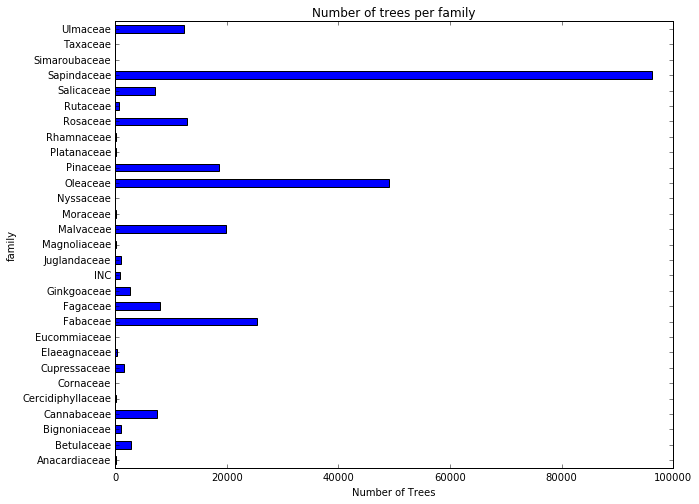

In [20]:
# Histogram of families
plt.title('Number of trees per family')
plt.xlabel('Number of Trees')
all_trees.groupby('family')['id'].nunique().plot(kind='barh', figsize=(10,8))

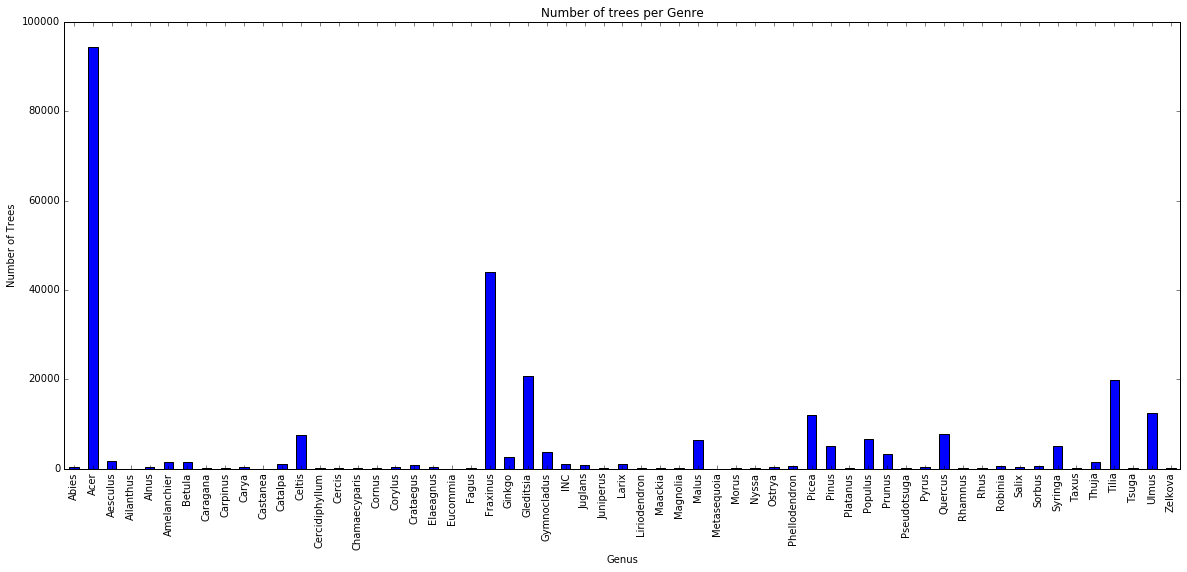

In [21]:
# Histogram of genres
plt.title('Number of trees per Genre')
plt.ylabel('Number of Trees')
all_trees.groupby('genus')['id'].nunique().plot(kind='bar', figsize=(20,8))
plt.xlabel('Genus')

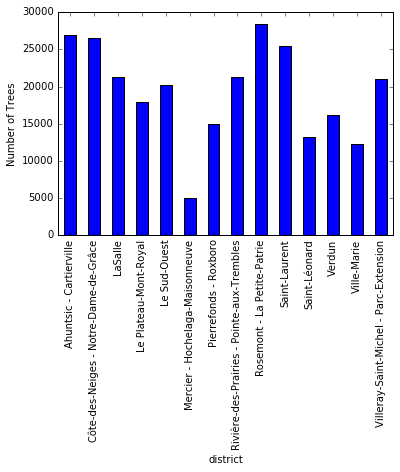

In [22]:
# Number of trees per district
plt.ylabel('Number of Trees')
all_trees.groupby('district')['id'].nunique().plot(kind='bar')

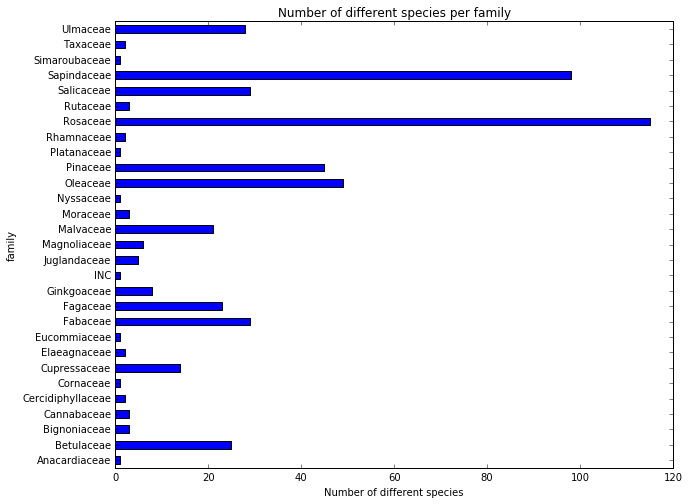

In [23]:
# Number of different species in each family
plt.title('Number of different species per family')
plt.xlabel('Number of different species')
all_trees.groupby('family')['specie_latin'].nunique().plot(kind='barh', figsize=(10,8))

In [24]:
# Number of genres per family.
plt.ylabel('Number of Trees')
all_trees.groupby('family')['genus'].count().plot(kind='bar', figsize=(10,8))

In [25]:
# List of genres by family, according to planted trees.
all_trees.groupby('family')['genus'].unique()

family
Anacardiaceae                                                   [Rhus]
Betulaceae                  [Betula, Alnus, Ostrya, Corylus, Carpinus]
Bignoniaceae                                                 [Catalpa]
Cannabaceae                                                   [Celtis]
Cercidiphyllaceae                                     [Cercidiphyllum]
Cornaceae                                                     [Cornus]
Cupressaceae            [Thuja, Juniperus, Chamaecyparis, Metasequoia]
Elaeagnaceae                                               [Elaeagnus]
Eucommiaceae                                                [Eucommia]
Fabaceae             [Robinia, Gleditsia, Gymnocladus, Maackia, Car...
Fagaceae                                    [Quercus, Fagus, Castanea]
Ginkgoaceae                                                   [Ginkgo]
INC                                                              [INC]
Juglandaceae                                          [Carya, Juglans]

In [26]:
# Number of trees per genre in each district.
plt.ylabel('Number of Trees')
all_trees.groupby('district')['genus'].count().plot(kind='bar', figsize=(7,5))
plt.xlabel('District')


In [27]:
# Number of trees per genre in each district.
plt.title('Number of trees per genus in each district')
all_trees.groupby('district')['genus'].count().plot(kind='pie', figsize=(7,5))
plt.ylabel('')


## Geospacial Queries

Using geopy and Solr, we can even retrieve trees based on geolocation criterias. So, given an adress or a latitude-longitude pair, we can find all trees inside a circunference centered at this point. Or we can get the top-k most closer trees to that point, for example. And, for sure, we can easily generate statistics over these results.

In [28]:
# Given a location (e.g., 'Parc Saint-Paul, Montreal'), we can easily find the top-k trees more closer to it.
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("Parc Saint-Paul,Montreal")
k = 100

params={
    'q': '{!func}geodist()',
    'pt': str(location.latitude) +','+ str(location.longitude),
    'sfield':'coord',
    'rows': k,
    'start': 0,
    'fl': '*, score, _dist_:geodist()',
    'sort': 'score asc'
}

resp = requests.get('http://localhost:8983/solr/urban-forest/select?',params=params)
top_trees = pd.DataFrame(resp.json()['response']['docs'])
top_trees

DBH    _dist_            _version_ area_id area_name    code  \
0   53.0  0.007413  1601718605845626889       1   INCONNU    ACSA   
1   63.0  0.007473  1601718605844578313       1   INCONNU    ACSA   
2   37.0  0.009565  1601718605850869770       1   INCONNU    ACSA   
3   46.0  0.010758  1601718605846675468       1   INCONNU    ACSA   
4   10.0  0.010924  1601718605849821196       1   INCONNU    ACSC   
5   59.0  0.011822  1601718605849821195       1   INCONNU    ACSA   
6   46.0  0.013827  1601718605843529729       1   INCONNU    ACSA   
7   58.0  0.014329  1601718605843529730       1   INCONNU    ACSA   
8   53.0  0.014795  1601718605844578314       1   INCONNU    ACSA   
9   56.0  0.014825  1601718605846675462       1   INCONNU    ACSA   
10  51.0  0.014943  1601718605848772609       1   INCONNU    ACSA   
11  51.0  0.015296  1601718605848772608       1   INCONNU    ACSA   
12  70.0  0.017422  1601718605846675467       1   INCONNU    ACSA   
13  69.0  0.018036  1601718605850869769       1   INCONNU    ACSA   
14  70.0  0.018424  1601718605846675463       1   INCONNU    ACSA   
15  47.0  0.018720  1601718605845626890       1   INCONNU    ACSA   
16  37.0  0.020071  1601718605849821197       1   INCONNU    ACSA   
17   6.0  0.020767  1601718605864501257       1   INCONNU  ACPLRR   
18  44.0  0.021406  1601718605844578304       1   INCONNU    ACSA   
19  35.0  0.021820  1601718605843529728       1   INCONNU    ACSA   
20  13.0  0.022588  1601718605848772610       1   INCONNU    ACSC   
21  49.0  0.023002  1601718605843529731       1   INCONNU    ACSA   
22  62.0  0.023096  1601718605847724044       1   INCONNU    ACSA   
23  52.0  0.023258  1601718605844578315       1   INCONNU    ACSA   
24  53.0  0.024881  1601718605849821194       1   INCONNU    ACSA   
25   8.0  0.026448  1601718605850869760       1   INCONNU    ACSC   
26  13.0  0.026481  1601718605848772614       1   INCONNU    ACSC   
27  40.0  0.027073  1601718605850869768       1   INCONNU    ACSA   
28  47.0  0.027384  1601718605846675461       1   INCONNU    ACSA   
29  29.0  0.027470  1601718605845626891       1   INCONNU    ACSA   
..   ...       ...                  ...     ...       ...     ...   
70  82.0  0.041132  1601718605847724036       1   INCONNU    ACSA   
71  24.0  0.042445  1601718605846675459       1   INCONNU    ACSA   
72  10.0  0.042584  1601718605843529737       1   INCONNU    ACPL   
73  16.0  0.042828  1601718605846675465       1   INCONNU    ACSA   
74  26.0  0.042866  1601718605847724035       1   INCONNU    ACSA   
75  46.0  0.043159  1601718605845626886       1   INCONNU    ACSA   
76  13.0  0.043817  1601718605843529734       1   INCONNU    ACPL   
77   5.0  0.044110  1601718605914832898       1   INCONNU    OSVI   
78  56.0  0.044205  1601718605849821187       1   INCONNU    ACSA   
79  77.0  0.045231  1601718605845626882       1   INCONNU    ACSA   
80  51.0  0.045653  1601718605848772622       1   INCONNU    ACSA   
81  15.0  0.046405  1601718605842481153       1   INCONNU    ACPL   
82  54.0  0.046486  1601718605849821190       1   INCONNU    ACSA   
83  61.0  0.046605  1601718605845626892       1   INCONNU    ACSA   
84  57.0  0.046762  1601718605845626881       1   INCONNU    ACSA   
85  18.0  0.047256  1601718605842481154       1   INCONNU    ACSC   
86  45.0  0.047264  1601718605847724040       1   INCONNU    ACSA   
87  48.0  0.047335  1601718605844578305       1   INCONNU    ACSA   
88  30.0  0.047525  1601718605847724041       1   INCONNU    FRPE   
89  62.0  0.047657  1601718605845626880       1   INCONNU    ACSA   
90  71.0  0.047883  1601718605845626883       1   INCONNU    ACSA   
91  51.0  0.048234  1601718605844578309       1   INCONNU    ACSA   
92  68.0  0.048263  1601718605847724034       1   INCONNU    ACSA   
93  62.0  0.048442  1601718605850869764       1   INCONNU    ACSA   
94   5.0  0.049738  1601718605913784331       1   INCONNU  ULXXMO   
95   5.0  0.049860  1601718605914832896       1   INCONNU  ULXXMO   
96 

In [29]:
# Given a location (e.g., 'Parc Saint-Paul, Montreal'), we can find all trees there are 
# located at most 500 meters of distance from it.
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("Parc Saint-Paul, Montreal")
k = 10000000

params={
    'q': '*:*',
    'fq': '{!geofilt sfield=coord}',
    'pt': str(location.latitude) +','+ str(location.longitude),
    'd':0.5,
    'rows': k,
    'start': 0,
    'fl': '*, score'
}

resp = requests.get('http://localhost:8983/solr/urban-forest/select?',params=params)
trees = pd.DataFrame(resp.json()['response']['docs'])
trees

DBH            _version_ area_id            area_name civic_number  \
0      25.0  1601718605480722435       1    DE L'ÉGLISE-CABOT          NaN   
1      17.0  1601718605480722437       1    DE L'ÉGLISE-CABOT          NaN   
2      27.0  1601718605480722439       1    DE L'ÉGLISE-CABOT          NaN   
3      25.0  1601718605480722442       1    DE L'ÉGLISE-CABOT          NaN   
4      33.0  1601718605481771008       1    DE L'ÉGLISE-CABOT          NaN   
5      25.0  1601718605481771010       1    DE L'ÉGLISE-CABOT          NaN   
6      31.0  1601718605481771011       1    DE L'ÉGLISE-CABOT          NaN   
7       7.0  1601718605518471174       1              INCONNU          NaN   
8      10.0  1601718605518471177       1              INCONNU          NaN   
9     100.0  1601718605518471179       1              INCONNU          NaN   
10      6.0  1601718605518471181       1              INCONNU          NaN   
11      6.0  1601718605519519745       1              INCONNU          NaN   
12    115.0  1601718605539442697       1              INCONNU          NaN   
13      5.0  1601718605646397442       1  Champigny/Jolicoeur          NaN   
14      5.0  1601718605646397443       1  Champigny/Jolicoeur          NaN   
15      5.0  1601718605646397444       1  Champigny/Jolicoeur          NaN   
16      5.0  1601718605646397446       1  Champigny/Jolicoeur          NaN   
17      5.0  1601718605646397447       1  Champigny/Jolicoeur          NaN   
18      5.0  1601718605646397448       1  Champigny/Jolicoeur          NaN   
19     27.0  1601718605729234952       1              INCONNU          NaN   
20     32.0  1601718605729234953       1              INCONNU          NaN   
21     35.0  1601718605729234954       1              INCONNU          NaN   
22     12.0  1601718605729234955       1              INCONNU          NaN   
23     18.0  1601718605729234956       1              INCONNU          NaN   
24     47.0  1601718605729234957       1              INCONNU          NaN   
25      5.0  1601718605752303617       1  Champigny/Jolicoeur          NaN   
26      5.0  1601718605752303618       1  Champigny/Jolicoeur          NaN   
27      5.0  1601718605752303620       1  Champigny/Jolicoeur          NaN   
28      5.0  1601718605752303621       1  Champigny/Jolicoeur          NaN   
29      5.0  1601718605752303622       1  Champigny/Jolicoeur          NaN   
...     ...                  ...     ...                  ...          ...   
1419    9.0  1601718618031128582       1            À definir          NaN   
1420    7.0  1601718618031128583       1            À definir          NaN   
1421   15.0  1601718618031128584       1            À definir          NaN   
1422   11.0  1601718618031128585       1            À definir          NaN   
1423   14.0  1601718618031128586       1            À definir          NaN   
1424   11.0  1601718618031128587       1            À definir          NaN   
1425   11.0  1601718618038468618       1            À definir          NaN   
1426    6.0  1601718618468384771     NaN                  NaN       [4101]   
1427    6.0  1601718618468384772     NaN                  NaN       [4101]   
1428    6.0  1601718618468384773     NaN                  NaN       [4101]   
1429   41.0  1601718618468384778     NaN                  NaN       [4330]   
1430   45.0  1601718618468384779     NaN                  NaN       [4330]   
1431   50.0  1601718618468384780     NaN                  NaN       [4330]   
1432   30.0  1601718618469433353     NaN                  NaN       [4450]   
1433   36.2  1601718618469433354     NaN                  NaN       [4450]   
1434   36.0  1601718618946535435     NaN                  NaN       [4101]   
1435   25.0  1601718619046150154     NaN                  NaN       [1150]   
1436   24.0  1601718619046150155     NaN                  NaN       [1150]   
1437   19.0  1601718619046150156     NaN                  NaN       [1150]   
1438   20.0  16017186190471987

In [30]:
# Histogram of top-10 families inside 0.5km from 'Parc Saint-Paul'
print('Total number of trees inside this area: {}'.format(len(trees)))
trees.groupby('specie_latin')['id'].nunique().sort_values(ascending=False).plot(kind='bar', figsize=(20,8))

Total number of trees inside this area: 1449


Total number of trees inside this area: 1449


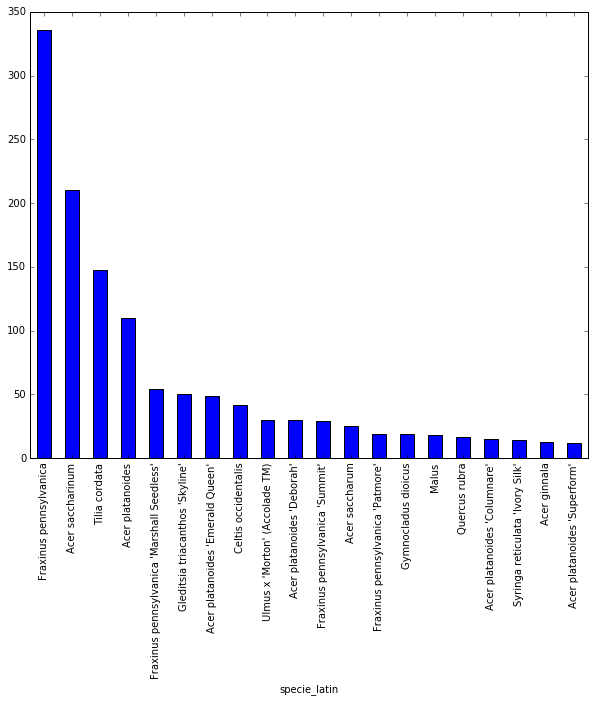

In [31]:
# we can try to plot it again, but only for the top-20 most frequent families
print('Total number of trees inside this area: {}'.format(len(trees)))
trees.groupby('specie_latin')['id'].nunique().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(10,8))

In [32]:
# Histogram of genres inside 0.5km from 'Parc Saint-Paul'
trees.groupby('genus')['id'].nunique().plot(kind='bar', figsize=(10,8))

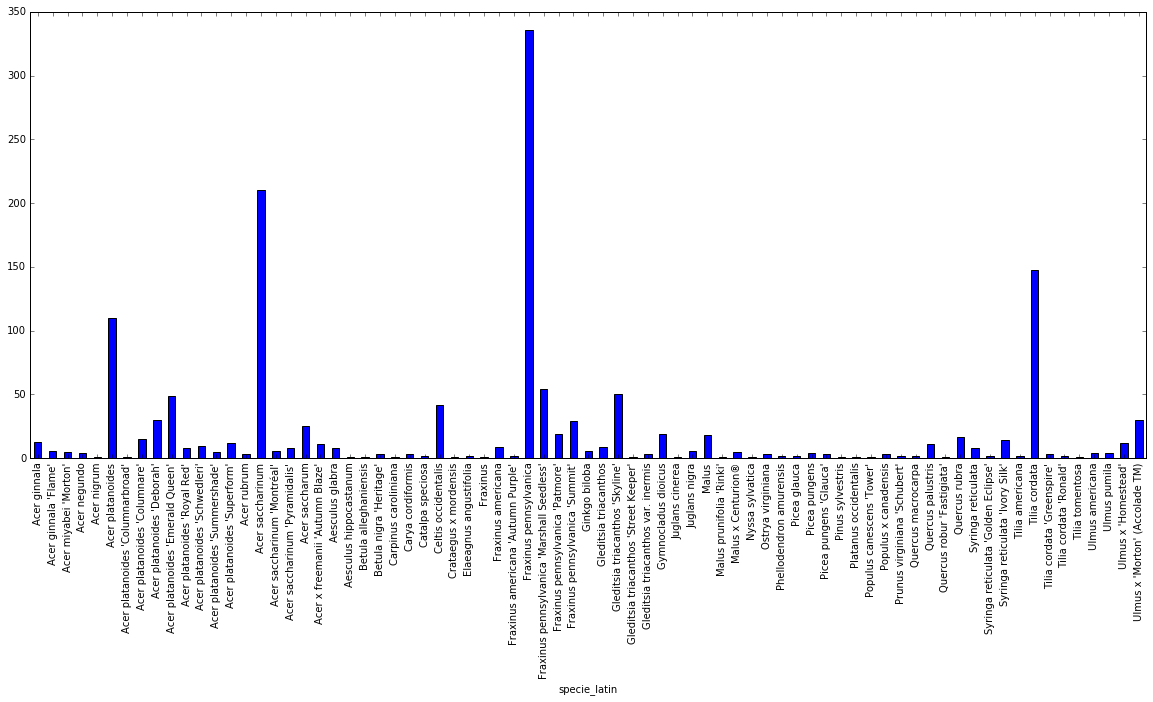

In [33]:
# Histogram of species inside 0.5km from 'Parc Saint-Paul'
trees.groupby('specie_latin')['id'].nunique().plot(kind='bar', figsize=(20,8))

In [34]:
# Table of each specie inside 0.5km from 'Parc Saint-Paul' and its frequency.
# Ordered by frequency on descending order
trees.groupby('specie_latin')['id'].nunique().sort_values(ascending=False)

specie_latin
Fraxinus pennsylvanica                        336
Acer saccharinum                              210
Tilia cordata                                 148
Acer platanoides                              110
Fraxinus pennsylvanica 'Marshall Seedless'     54
Gleditsia triacanthos 'Skyline'                50
Acer platanoides 'Emerald Queen'               49
Celtis occidentalis                            42
Ulmus x 'Morton' (Accolade TM)                 30
Acer platanoides 'Deborah'                     30
Fraxinus pennsylvanica 'Summit'                29
Acer saccharum                                 25
Fraxinus pennsylvanica 'Patmore'               19
Gymnocladus dioicus                            19
Malus                                          18
Quercus rubra                                  17
Acer platanoides 'Columnare'                   15
Syringa reticulata 'Ivory Silk'                14
Acer ginnala                                   13
Acer platanoides 'Superform'         

In [35]:
# Plot the position of trees inside 0.5km from 'Parc Saint-Paul'
plt.figure(figsize=(13, 8))
df = trees
df['latitude'] = df['coord'].apply(lambda x: float(x.split(',')[0]))
df['longitude'] = df['coord'].apply(lambda x: float(x.split(',')[1]))

ax = plt.subplot(1, 2, 1)
ax.set_title("Data")

ax.set_autoscaley_on(False)
ax.set_autoscalex_on(False)
ax.set_ylim([df['latitude'].min(), df['latitude'].max()])
ax.set_xlim([df['longitude'].min(),df['longitude'].max()])
plt.xlabel('longitude', fontsize=16)
plt.ylabel('latitude', fontsize=16)
plt.scatter(df["longitude"],
            df["latitude"],
            cmap="coolwarm")

_ = plt.plot()